# 1.1) Data understanding (DU)

Goal: define characters's attribute, detect missing values and outliers

In [11]:
%conda install pandas

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

notebook_dir = Path().resolve()
data_path = notebook_dir.parents[1] / "Data" / "procedure_code_4.csv"

In [13]:
df = pd.read_csv(data_path)

## Attribute's character

In [14]:
df.shape

(14497, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  14497 non-null  int64 
 1   hadm_id     14497 non-null  int64 
 2   seq_num     14497 non-null  int64 
 3   chartdate   14497 non-null  object
 4   icd_code    14497 non-null  object
 5   long_title  14497 non-null  object
dtypes: int64(3), object(3)
memory usage: 679.7+ KB


## Missing values
We estimate the percentage of *missing values* contained in each column. 

In [16]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"Column '{col}': {missing_percentage:.2f}% missing values")

Column 'subject_id': 0.00% missing values
Column 'hadm_id': 0.00% missing values
Column 'seq_num': 0.00% missing values
Column 'chartdate': 0.00% missing values
Column 'icd_code': 0.00% missing values
Column 'long_title': 0.00% missing values


Now, we estimate the types hiddenly taken by each columns

In [17]:
for col in df.columns:
    print (f"{col}: {df[col].map(type).value_counts()}")

subject_id: subject_id
<class 'int'>    14497
Name: count, dtype: int64
hadm_id: hadm_id
<class 'int'>    14497
Name: count, dtype: int64
seq_num: seq_num
<class 'int'>    14497
Name: count, dtype: int64
chartdate: chartdate
<class 'str'>    14497
Name: count, dtype: int64
icd_code: icd_code
<class 'str'>    14497
Name: count, dtype: int64
long_title: long_title
<class 'str'>    14497
Name: count, dtype: int64


### Bar chart for the missing values

/tmp/ipykernel_6562/4090193844.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')


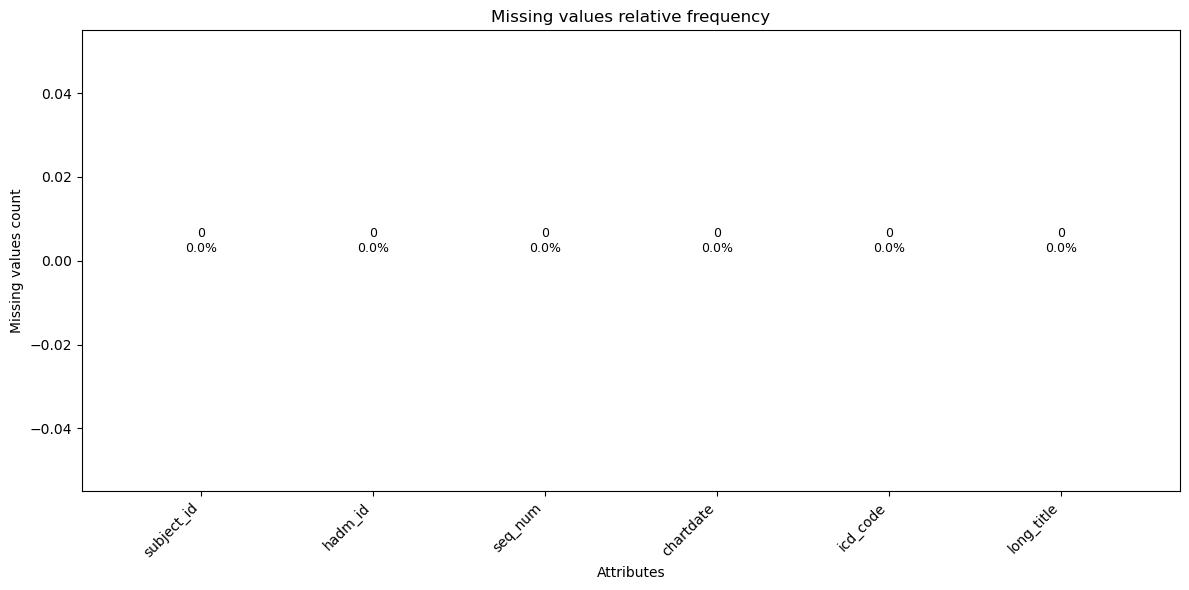

In [18]:
# Bar chart dei missing values per colonna (frequenza e percentuale)
missing_counts = df.isnull().sum()
total = len(df)
missing_counts = missing_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='tab:blue', alpha=0.8)
ax.set_title("Missing values relative frequency")
ax.set_xlabel("Attributes")
ax.set_ylabel("Missing values count")
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')
for bar, count in zip(bars, missing_counts.values):
    pct = count / total * 100
    ax.annotate(f"{count}\n{pct:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

We have no missing values on this dataFrame.
